# **CLASSWORK-3/REDDIT_APP_DATA**

**Authentication**

In [43]:
#installing praw package
pip install praw

In [29]:
##importing praw package
import praw
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="_pv720xfCgXOHEmbgBNCgg",
    client_secret="3k3wbDwk3dRlWrlw7CzB62_3RX_NIA",
    user_agent=user_agent)

**IMPORTING PACKAGES**

In [30]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression



# **SELECT TRENDING TOPIC FROM REDDIT**

The "bitcoin" subreddit channel will be use for this project

In [31]:
# Hot new rising topics
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
205
0.95
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


**GET TOTAL COMMENT IN SUBREDDIT**

In [32]:
#top posts from the "bitcoin" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

787



**SCRAPPED DATA**

In [33]:
#Create a dataframe from the scrapped data
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,"According to google, there is around 3.4 quadr..."
1,I’ve never experienced a 10k candle…
2,Please help me figure out why this transaction...
3,Poll. How many of you think that hodling bitco...
4,Full Node


**REMOVING UNWANTED COLUMNS**

In [34]:
df = bitcoin_df.iloc[:, 1:]#removes unwanted columns in left
bitcoin_df.head()

,0
0,"According to google, there is around 3.4 quadr..."
1,I’ve never experienced a 10k candle…
2,Please help me figure out why this transaction...
3,Poll. How many of you think that hodling bitco...
4,Full Node


**RETRIEVING COLUMN NAME**

In [35]:
#gives the column names
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

**RENAMING COLUMNS**

In [36]:
#renaming the column to titles
bitcoin_df.columns = ['Titles']

**HEAD METHOD**

In [37]:
#Gives first five columns in the dataframe
bitcoin_df.head()

,Titles
0,"According to google, there is around 3.4 quadr..."
1,I’ve never experienced a 10k candle…
2,Please help me figure out why this transaction...
3,Poll. How many of you think that hodling bitco...
4,Full Node


**COUNTING DUPLICATE VALUES**

In [38]:
#counts the number of duplicate values in the 'Titles' column
bitcoin_df.Titles.duplicated().sum()

0

**TWITTER DATA PREPROCESSING FOR BITCOIN ANALYSIS**

In [39]:
#Clean the text
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :

    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,"According to google, there is around 3.4 quadr..."
1,I’ve never experienced a 10k candle…
2,Please help me figure out why this transaction...
3,Poll. How many of you think that hodling bitco...
4,Full Node


**REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS**

In [40]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,"According to google, there is around 3.4 quadr..."
1,I’ve never experienced a 10k candle…
2,Please help me figure out why this transaction...
3,Poll. How many of you think that hodling bitco...
4,Full Node


**TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD**

In [42]:
#installing textblob package
pip install textblob

In [44]:
#importing modules
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS


**SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF BITCOIN RELATED TEXT**

In [45]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()


,Titles,Subjectivity,Polarity
0,"According to google, there is around 3.4 quadr...",0.10,0.30
1,I’ve never experienced a 10k candle…,0.90,-0.40
2,Please help me figure out why this transaction...,1.00,-0.20
3,Poll. How many of you think that hodling bitco...,0.45,0.05
4,Full Node,0.55,0.35


**CATEGORIZING BITCOIN SENTIMENT**

In [46]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"According to google, there is around 3.4 quadr...",0.100000,0.300000,Positive
1,I’ve never experienced a 10k candle…,0.900000,-0.400000,Negative
2,Please help me figure out why this transaction...,1.000000,-0.200000,Negative
3,Poll. How many of you think that hodling bitco...,0.450000,0.050000,Positive
4,Full Node,0.550000,0.350000,Positive
5,Harvest Hong Kong Submits Spot Bitcoin ETF App...,0.000000,0.000000,Neutral
6,Same old stories new year,0.259848,0.078788,Positive
7,Satoshis for All (MATH Question),0.000000,0.000000,Neutral
8,Questions about DCA and UTXO,0.000000,0.000000,Neutral
9,The Million Bitcoin APP is in Alpha 2!,0.000000,0.000000,Neutral



# **Data Visualization**

In [47]:
#create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


**VISUALIZING BITCOIN SENTIMENT DISTRIBUTION**

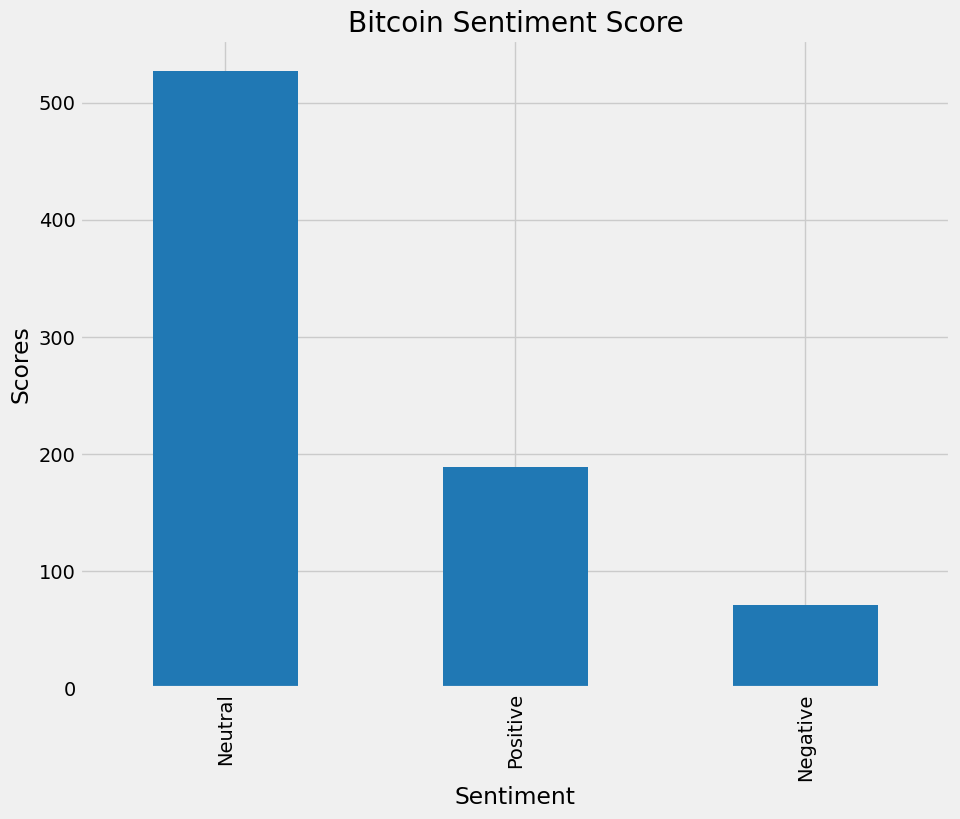

In [48]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# **WORDCLOUD FOR BITCOIN**

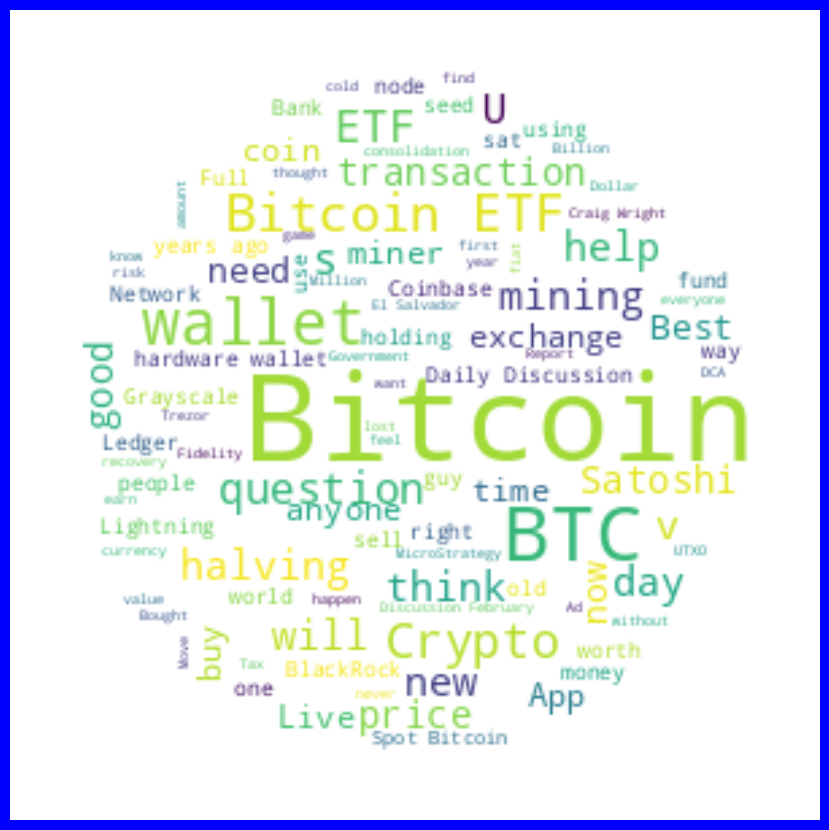

In [66]:
#importing the libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

# Combine all titles into a single string
text = ' '.join([twts for twts in bitcoin_df['Titles']])

# Define a custom shape
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600, max_words=100, stopwords=STOPWORDS,
                      background_color="white", mask=mask).generate(text)

# Display the generated image
plt.figure(figsize=(20, 10), facecolor='b')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

